In [1]:
# Naive Bayes

# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset
dataset = pd.read_csv('D:\Personal\Maestria BigData\Módulo 7. Data mining, machine learning y deep learning\Datos\Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values # Elige edad y salario estimado
y = dataset.iloc[:, 4].values # Valor Purchased
print(X)
print()
print(y)

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("Train")
print(X_train)
print("Test")
print(X_test)

# Entrenamiento
from sklearn.naive_bayes import GaussianNB
# No se especifican parametros de de entrada aunque se podria especificar unas probabilidades
# a priori distintas de las que se infieren directamente con los datos de train.
classifier = GaussianNB() 
classifier.fit(X_train, y_train)

# Prediccion
y_pred = classifier.predict(X_test)
print("Predictor")
print(y_pred)

# Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

array([[55,  3],
       [ 4, 18]], dtype=int64)

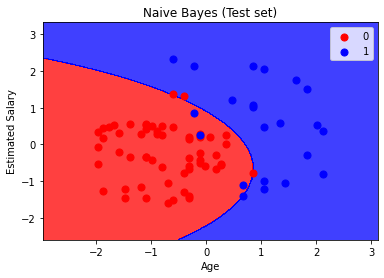

In [2]:
### Visualization
# Frontera de decision
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Datos como series
y_test_s = pd.Series(y_test)
target_names=['0','1']

# Indices de los labels
idxPlus=y_test_s[y_test_s==0].index
idxMin=y_test_s[y_test_s==1].index

# Visualizacion de los puntos de datos
plt.scatter(X_test[idxPlus,0],X_test[idxPlus,1],c='r',s=50, label='0')
plt.scatter(X_test[idxMin,0],X_test[idxMin,1],c='b',s=50, label='1')

plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# En el gráfico se ven los datos bien clasificados de los que no.